# Final Review Notebook!

Contains the code/questions from the review session, starting from tables! If you want to verify your answers for the preceeding questions, take a look at the review [presentation](https://docs.google.com/a/berkeley.edu/presentation/d/1g27JukUiCZlXlonkYfqhYDQKdqTc2CiVp0IM91Q0xRs/edit?usp=sharing), or try your code out in the [playground](https://data8r.datahub.berkeley.edu/user-redirect/interact?account=data-8r&repo=course-assets&path=materials/su17/demos/playground). Additionally, the questions on null hypotheses, random sampling, and causality are not included. Talk to your TA/study buddies about those!

NOTE: Some of this code does not run, because there are no tables to read in!

In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Tables

**Question 1:** Read in a table from a csv named 'tables.csv'

In [ ]:
Table.read_table('tables.csv') #Can't run

**Question 2:** Create a table called die_rolls that has a column for the number of sides of a die called ‘sides’, and a column that specifies the percent chance of getting each side called ‘%Chance’. Create this table for dies from 3 sides to 20. 

In [5]:
die_rolls = Table().with_columns('sides', np.arange(3, 21),
                                '%Chance', 1 / np.arange(3, 21))
die_rolls

sides,%Chance
3,0.333333
4,0.25
5,0.2
6,0.166667
7,0.142857
8,0.125
9,0.111111
10,0.1
11,0.0909091
12,0.0833333


**Question 3:** Use .take to get a table with only dies with sides 4, 6, and 10

In [8]:
die_rolls.take(make_array(1, 4, 7)) #Remember that indices start at 0! Additionally, remember that .take takes an array as input

sides,%Chance
4,0.25
7,0.142857
10,0.1


**Question 4:** Use .where to get the dies with less than ⅕ chance of rolling each side


In [9]:
die_rolls.where("%Chance", are.below(1/5))

sides,%Chance
6,0.166667
7,0.142857
8,0.125
9,0.111111
10,0.1
11,0.0909091
12,0.0833333
13,0.0769231
14,0.0714286
15,0.0666667


**Question 5:** Create a table called dice that only has the ‘sides’ column of the die_rolls table

In [11]:
dice = die_rolls.select(0) #or die_rolls.select('sides')
dice

sides
3
4
5
6
7
8
9
10
11
12


**Question 6:** Add a column to the dice table called ‘%Chance3Lower’ which computes the chance of getting a dice roll of 3 or lower for each die in dice. Hint - use the chances that you computed in die_rolls!

In [13]:
dice = dice.with_columns("%Chance3Lower", 3 * die_rolls.column(1)) #Or die_rolls.column('%Chance')
dice

sides,%Chance3Lower
3,1
4,0.75
5,0.6
6,0.5
7,0.428571
8,0.375
9,0.333333
10,0.3
11,0.272727
12,0.25


## Visualizations

**Question 1:** Create a line plot of the number of sides a die has versus the percent chance of getting a roll 3 or lower (use the dice table!)

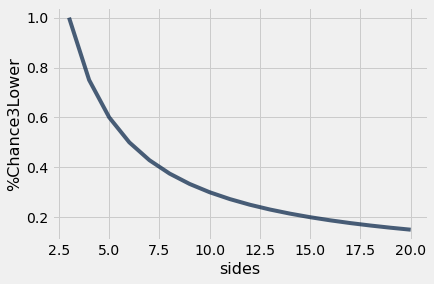

In [14]:
dice.plot(0, 1) #dice.plot('sides', '%Chance3Lower')

**Question 2:** Suppose that you have a table called favorite_foods. It has 1 column called ‘food’. Create a bar graph without modifying the table.

In [ ]:
favorite_foods.group_barh('food') #or favorite_foods.barh(0) Don't Run

**Question 3:** Now create the same bar graph by modifying the table (Hint: Use group!)

In [ ]:
favorite_foods.group(0).barh(0,1) #Don't Run, or favorite_foods.group('food').barh('food', 'count')

**Question 4:** Suppose that you have a table called exercise_v_work that has 2 columns, one called ‘exercise amount’, and one called ‘work_amount’. Suppose that these are all numeric quantities. How could you create a scatter plot? 

In [ ]:
exercise_v_work.scatter('exercise amount', 'work amount') #Don't run, or exercise_v_work.scatter(0, 1)

In [19]:
flowers = Table().with_columns("petal length", make_array(7,7.5,8,8,8.5,8.5,8.5,8.5,9,9,9,9,9.5,9.5,9.5,10,10,10,10,10.5,10.5,10.5,10.5, 11,11.5,12,12,12.5,12.5, 13))

## Histograms

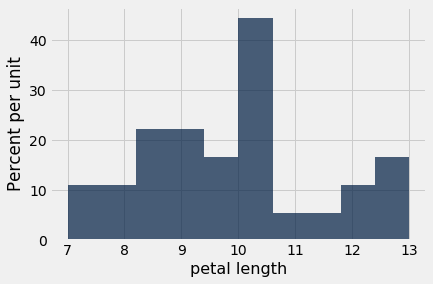

In [20]:
flowers.hist() #Optionally include bins to make it look like our graph, bins = np.arange(7,13.5, 0.5)

**Question 2:** Estimate the percentage of petals that had a length greater than or equal to 9 cm? 

In [22]:
100 - (25 * 0.5) - (13 * 0.5) - (7 * 0.5) - (7 * 0.5)

#74%

74.0

**Question 3:** Estimate the percentage of petals that had a length smaller than 7.125 cm?

Unknown! The bins are of size 0.5. We can't determine the distribution of data inside the histogram, so we don't know about the percentage of petals that had a length smaller than 7.125!

**Question 4:** What are the lower and upper bounds on the percentage of petals that are smaller than 7.125 cm?

In the best case, all of the data in the 7 - 7.5 bin is all concentrated below 7.125. That means in the best case, we have 5 x 0.5 = 2.5% of the data. In the worst case, none of the data in that bin is below 7.125, which means that we have 0% of the data. 

## Where

**Question 1:** How can we create a table of only ‘Scandinavian’ people? 

In [ ]:
census.where('Ethnicity', are.equal_to('Scandinavian')) #Don't run
#Could have used are.containing as well

**Question 2:** How can we create a table of only people with an income of $100,000 or greater? 

In [ ]:
census.where('Income', are.above_or_equal_to(100000)) #Don't run

**Question 3:** How can we create a table of ‘German’ people who make more than $1,000,000, and have 2 children?

In [ ]:
census.where('Ethnicity', are.equal_to('German')).where('Income', are.above(1000000)).where("Children#", are.equal_to(2))
#Don't Run

## Group

**Question 1:** Using our census table from earlier, what column labels would the table that is given from census.group(‘Ethnicity’) have?

In [ ]:
#Ethnicity, count

**Question 2:** What column labels would the table that is given from census.group(‘Ethnicity’, sum) have?

In [ ]:
#Ethnicity, Income sum, Children sum

**Question 3:** What column labels would the table that is given from census.group(‘Ethnicity’, np.mean) have?

In [ ]:
#Ethnicity, Income mean, Children# mean, 

**Question 4:** Suppose that I want to find the range (max - min) by using .group. Define a function to group by, and then use that function to group the data in census. What column labels would the resulting table have?

In [23]:
def range(array): 
    return max(array) - min(array)
census.group(0, range) #Don't run!

## Apply

**Question 1:** Suppose that we have a table called locale that has 2 columns “zip”, which contains the zip code, and “population”, which contains the population living there. Additionally, we have a table called locale_income which has 2 columns “zip”, which contains the zip code, and “average_income”, which contains the average income for a zip. Define a function that you can use with apply to return the average income for a specific zip code. 

In [24]:
def get_income(zipcode):
    correct_zip_table = locale_income.where("zip", are.equal_to(zipcode))
    return correct_zip_table.column("income").item(0) #The idea here is that there is only 1 item in
                                                        #the column, so we retrieve it from it's default index
                                                        #0

**Question 2** Add a column to the locale table called “average_income”, created by applying your function from the previous question. 

In [ ]:
locale = locale.with_columns("average_income", locale.apply(get_income, "zip")) #Don't run